<a href="https://colab.research.google.com/github/cgurkan/fake-news/blob/main/FakeNewsPreprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#!pip install text-hammer
#!pip install cleantext

In [3]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt 
import seaborn as sns
import math

BASE_URL = "/content/drive/MyDrive/Colab Notebooks/fakenews/"

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df_train = pd.read_csv(BASE_URL+"data/train/Task3_english_training.csv")
df_train.head()

,public_id,text,title,our rating
0,5a228e0e,Distracted driving causes more deaths in Canad...,"You Can Be Fined $1,500 If Your Passenger Is U...",FALSE
1,30c605a1,Missouri politicians have made statements afte...,Missouri lawmakers condemn Las Vegas shooting,partially false
2,c3dea290,Home Alone 2: Lost in New York is full of viol...,CBC Cuts Donald Trump's 'Home Alone 2' Cameo O...,partially false
3,f14e8eb6,But things took a turn for the worse when riot...,Obama’s Daughters Caught on Camera Burning US ...,FALSE
4,faf024d6,It’s no secret that Epstein and Schiff share a...,Leaked Visitor Logs Reveal Schiff’s 78 Visits ...,FALSE


In [6]:
df_test = pd.read_csv(BASE_URL+"data/test/English_data_test_release_with_rating.csv")
df_test.head()

,ID,text,title,our rating
0,122653045997905671927713471889615536378,The deputy secretary at the US Treasury has sa...,US Treasury deputy sec warns that shortages li...,Partially false
1,275389285957305997321446227088442471741,KABUL—Approximately twelve minutes after U.S. ...,CNN Praises Taliban For Wearing Masks During A...,Other
2,333248764296609831067233855420575814716,The vast majority of (oblivious) Americans hav...,Tennessee Has Just LEGALIZED Government COVID ...,false
3,264019763253447756851916399533799891538,(Natural News) There’s a secret layer of infor...,MEDICAL SHOCKER: Scientists at Sloan Kettering...,false
4,158073737187690682830899773280916034317,"A recent study reported by the NCBI, which is ...",Study Results: Facemasks are Ineffective to Bl...,false


In [7]:
print(f"Training Data Shape: {df_train.shape}\nTest Data Shape: {df_test.shape}")

Training Data Shape: (900, 4)
Test Data Shape: (612, 4)


In [8]:
#Drop public_id column bot train and test dataset
df_train.drop(labels='public_id', axis=1, inplace=True)
df_test.drop(labels='ID', axis=1, inplace=True)

In [9]:
#Rename target column to "label"
df_train.rename(columns={"our rating":"label"}, inplace=True)
df_test.rename(columns={"our rating":"label"}, inplace=True)

In [10]:
df_train['label'] = df_train.label.map({'TRUE': 1, 'True':1, 'FALSE': 0, 'false':0, 'partially false': 2, 'Partially false': 2, 'other': 3, 'Other': 3})
df_train["label_name"] = df_train.label.map({0: 'False', 1:'True', 2:'Partially False',  3:'Other'})

In [11]:
df_test['label'] = df_test.label.map({'TRUE': 1, 'True':1, 'FALSE': 0, 'false':0, 'partially false': 2, 'Partially false': 2, 'other': 3, 'Other': 3})
df_test["label_name"] = df_test.label.map({0:'False', 1:'True', 2:'Partially False',  3:'Other'})

In [12]:
#clear NaN values with space, we don't use title
df_train['title'] = df_train['title'].replace(math.nan,' ')
df_test['title'] = df_test['title'].replace(math.nan,' ')


#concatenate text and title columns
df_train["news"] = df_train["title"] + ' ' + df_train["text"]
df_test["news"] = df_test["title"] + ' ' + df_test["text"]

In [13]:
df_train['num_words'] = df_train['news'].apply(lambda x:len(x.split()))

# Data Preprocessing

## Cleaning

In [14]:
import text_hammer as th

In [15]:
%%time
from tqdm._tqdm_notebook import tqdm_notebook
tqdm_notebook.pandas()

def text_preprocessing(df, col_name):
    column = col_name
    df[column] = df[column].progress_apply(lambda x:str(x).lower())
    df[column] = df[column].progress_apply(lambda x: th.cont_exp(x)) #you're -> you are; i'm -> i am
    df[column] = df[column].progress_apply(lambda x: th.remove_emails(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_html_tags(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_stopwords(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_special_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.remove_accented_chars(x))
    df[column] = df[column].progress_apply(lambda x: th.make_base(x)) #ran -> run,
    return(df)

CPU times: user 662 µs, sys: 29 µs, total: 691 µs
Wall time: 697 µs


In [16]:
cleaned_df = text_preprocessing(df_train, "news")

  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

  0%|          | 0/900 [00:00<?, ?it/s]

In [17]:
cleaned_df_test = text_preprocessing(df_test, "news")

  0%|          | 0/612 [00:00<?, ?it/s]

  0%|          | 0/612 [00:00<?, ?it/s]

  0%|          | 0/612 [00:00<?, ?it/s]

  0%|          | 0/612 [00:00<?, ?it/s]

  0%|          | 0/612 [00:00<?, ?it/s]

  0%|          | 0/612 [00:00<?, ?it/s]

  0%|          | 0/612 [00:00<?, ?it/s]

  0%|          | 0/612 [00:00<?, ?it/s]

In [18]:
cleaned_df['num_words'] = cleaned_df['news'].apply(lambda x: len(x.split()))

## Wordcloud & Frequencies

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
### Calculating the word frequency by using nltk
words_list = []
for sentence in cleaned_df.news:
    words_list.extend(nltk.word_tokenize(sentence))
freq_dist = nltk.FreqDist(words_list)
freq_dist.most_common(20)

[('say', 3046),
 ('people', 1911),
 ('year', 1636),
 ('state', 1566),
 ('not', 1399),
 ('new', 1368),
 ('health', 1085),
 ('work', 1084),
 ('report', 1065),
 ('time', 1060),
 ('government', 1047),
 ('trump', 1033),
 ('president', 989),
 ('national', 860),
 ('know', 855),
 ('need', 827),
 ('school', 821),
 ('like', 802),
 ('do', 791),
 ('include', 788)]

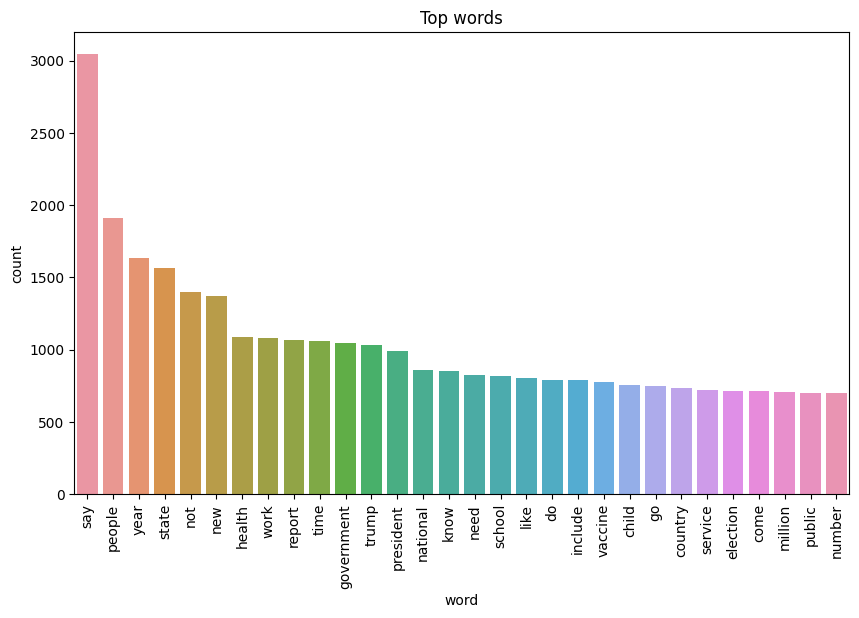

In [21]:
temp = pd.DataFrame(freq_dist.most_common(30),  columns=['word', 'count'])
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x='word', y='count', 
            data=temp, ax=ax)
plt.title("Top words")
plt.xticks(rotation='vertical');

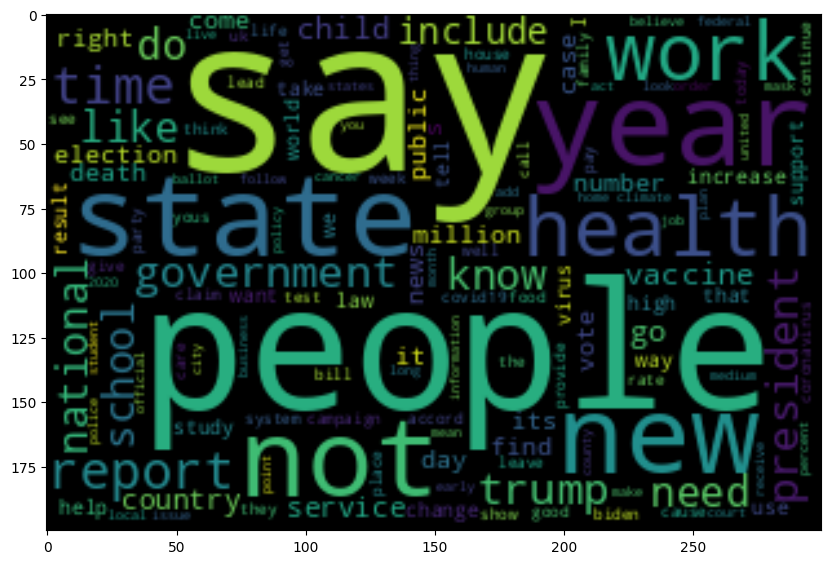

In [22]:
### Creating wordcloud
from wordcloud import WordCloud
import wordcloud
# creation of wordcloud
wcloud_fig = WordCloud( stopwords=set(wordcloud.STOPWORDS),
                      colormap='viridis', width=300, height=200).generate_from_frequencies(freq_dist)

# plotting the wordcloud
plt.figure(figsize=(10,7), frameon=True)

plt.imshow(wcloud_fig, interpolation  = 'bilinear')
plt.show()

# Modelling

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest,chi2,f_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn import tree
from sklearn.metrics import classification_report , confusion_matrix
from xgboost import XGBClassifier

#Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go 

In [24]:
X_train,X_test,y_train,y_test = cleaned_df.news, cleaned_df_test.news, cleaned_df.label, cleaned_df_test.label

In [25]:
X_train.shape, X_test.shape

((900,), (612,))

In [26]:
vectorizer = TfidfVectorizer(min_df=50,max_features=10000)
vector =  vectorizer.fit_transform(X_train)
x_train=vector.toarray()

vector2 = vectorizer.transform(X_test)
x_test=vector2.toarray()

In [27]:
selector = SelectKBest()
x_train = selector.fit_transform(x_train, y_train)
x_test = selector.fit_transform(x_test, y_test)

## NaiveBayes

In [28]:
nb = GaussianNB()
nb2 = BernoulliNB()
nb3 = MultinomialNB()
VotingClassifiers = VotingClassifier(estimators=[('GaussianNB', nb),('BernoulliNB',nb2), ('MultinomialNB', nb3)], voting = 'soft')
VotingClassifiers.fit(x_train, y_train)
VotingClassifiers.score(x_train,y_train),VotingClassifiers.score(x_test,y_test)

(0.5077777777777778, 0.2369281045751634)

In [29]:
votingclassifier = (VotingClassifiers.score(x_train,y_train),(VotingClassifiers.score(x_test,y_test)))
votingclassifier

(0.5077777777777778, 0.2369281045751634)

              precision    recall  f1-score   support

           0       0.47      0.38      0.42       315
           1       0.20      0.08      0.11       210
           2       0.02      0.05      0.03        56
           3       0.05      0.23      0.08        31

    accuracy                           0.24       612
   macro avg       0.18      0.18      0.16       612
weighted avg       0.31      0.24      0.26       612



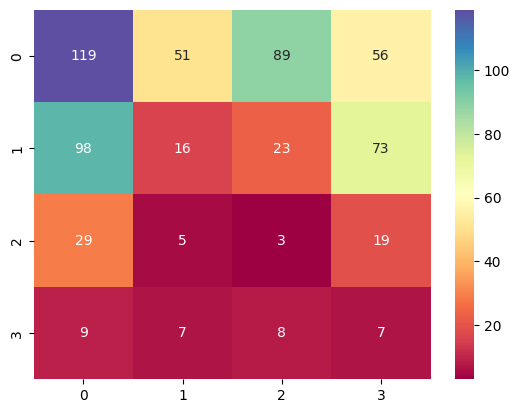

In [30]:
y_act=y_test
y_pred=VotingClassifiers.predict(x_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='Spectral', fmt='g')
print(classification_report(y_act,y_pred))

## Decision Tree classifier

In [31]:
model2 = DecisionTreeClassifier(criterion='gini',splitter='random',min_samples_leaf=70,max_depth=4,random_state=0)
model2.fit(x_train, y_train)
print(model2.score(x_train, y_train))
print(model2.score(x_test,y_test))

0.5222222222222223
0.3562091503267974


              precision    recall  f1-score   support

           0       0.45      0.66      0.54       315
           1       0.00      0.00      0.00       210
           2       0.06      0.18      0.10        56
           3       0.00      0.00      0.00        31

    accuracy                           0.36       612
   macro avg       0.13      0.21      0.16       612
weighted avg       0.24      0.36      0.29       612



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


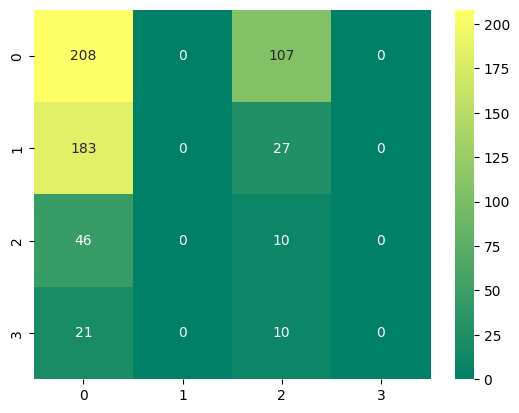

In [32]:
#confusion matrix and classification report
y_act=y_test
y_pred=model2.predict(x_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='summer', fmt='g')
print(classification_report(y_act,y_pred))

## RandomForest

In [33]:
classifiers = RandomizedSearchCV(RandomForestClassifier(),{'n_estimators':[4,5],'criterion':['entropy'],
                                                      'max_depth':range(1,4),'min_samples_split':range(2,5)},random_state=12)
classifiers.fit(x_train, y_train)
print('Training score:',classifiers.score(x_train, y_train))
print('Testing score:',classifiers.score(x_test,y_test))
print(classifiers.best_estimator_)

Training score: 0.5811111111111111
Testing score: 0.3055555555555556
RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_split=3,
                       n_estimators=4)


              precision    recall  f1-score   support

           0       0.42      0.55      0.48       315
           1       0.20      0.02      0.04       210
           2       0.05      0.16      0.08        56
           3       0.00      0.00      0.00        31

    accuracy                           0.31       612
   macro avg       0.17      0.18      0.15       612
weighted avg       0.29      0.31      0.27       612



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


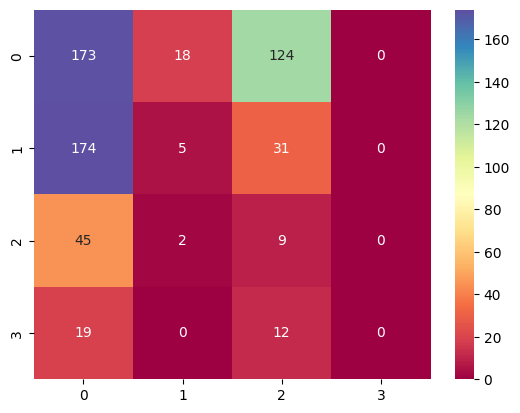

In [34]:
#confusion matrix and classification report
y_act=y_test
y_pred=classifiers.predict(x_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='Spectral', fmt='g')
print(classification_report(y_act,y_pred))

## GradientBoosting Classifier

In [35]:
model3 = RandomizedSearchCV(GradientBoostingClassifier(),{"learning_rate": range(3,5),
                "max_depth":[200],"max_features":range(6,10,2),
                 "n_estimators":[10]},random_state=8,n_jobs=-1)
model3.fit(x_train,y_train)
print('Training score:',model3.score(x_train,y_train))
print('Testing score:',model3.score(x_test,y_test))
model3.best_params_

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Training score: 0.9144444444444444
Testing score: 0.31699346405228757


{'n_estimators': 10, 'max_features': 6, 'max_depth': 200, 'learning_rate': 3}

              precision    recall  f1-score   support

           0       0.49      0.45      0.47       315
           1       0.35      0.17      0.23       210
           2       0.08      0.27      0.12        56
           3       0.08      0.06      0.07        31

    accuracy                           0.32       612
   macro avg       0.25      0.24      0.22       612
weighted avg       0.38      0.32      0.33       612



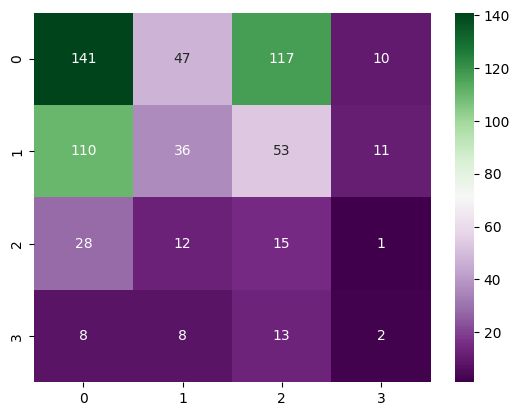

In [36]:
#confusion matrix and classification report
y_act=y_test
y_pred=model3.predict(x_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='PRGn', fmt='g')
print(classification_report(y_act,y_pred))

## XGBoost classifier

In [37]:
model = XGBClassifier( eval_metric='map',max_depth=200,n_estimators=70,learning_rate=1.99)
model.fit(x_train,y_train.replace({"Real":0,'Fake':1}))
print('Training score:',model.score(x_train,y_train))
print('Testing score:',model.score(x_test,y_test))

Training score: 0.3055555555555556
Testing score: 0.28921568627450983


In [38]:
XGboost_classifier = (model.score(x_train,y_train),model.score(x_test,y_test))
XGboost_classifier

(0.3055555555555556, 0.28921568627450983)

              precision    recall  f1-score   support

           0       0.47      0.14      0.22       315
           1       0.34      0.59      0.43       210
           2       0.08      0.11      0.09        56
           3       0.04      0.10      0.06        31

    accuracy                           0.29       612
   macro avg       0.23      0.23      0.20       612
weighted avg       0.37      0.29      0.27       612



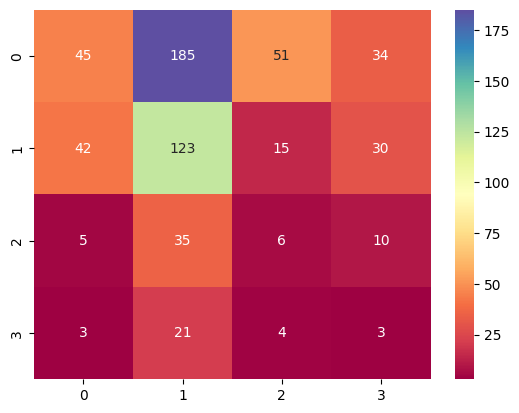

In [39]:
#confusion matrix and classification report
y_act = y_test
y_pred = model.predict(x_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='Spectral', fmt='g')
print(classification_report(y_act,y_pred))

## Ada_Boost(Random Forest)

In [40]:
RandomForest = RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_split=5, n_estimators=5)
AddaBoosts = AdaBoostClassifier(base_estimator =RandomForest,n_estimators=70,learning_rate=2.38,random_state=1)
AddaBoosts.fit(x_train,y_train)
print('Training score:',AddaBoosts.score(x_train,y_train))
print('Testing score:',AddaBoosts.score(x_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training score: 0.6122222222222222
Testing score: 0.43300653594771243


In [41]:
ab_rf = (AddaBoosts.score(x_train,y_train),(AddaBoosts.score(x_test,y_test)))
ab_rf

(0.6122222222222222, 0.43300653594771243)

              precision    recall  f1-score   support

           0       0.52      0.75      0.62       315
           1       0.43      0.10      0.17       210
           2       0.06      0.09      0.07        56
           3       0.04      0.03      0.04        31

    accuracy                           0.43       612
   macro avg       0.26      0.24      0.22       612
weighted avg       0.42      0.43      0.38       612



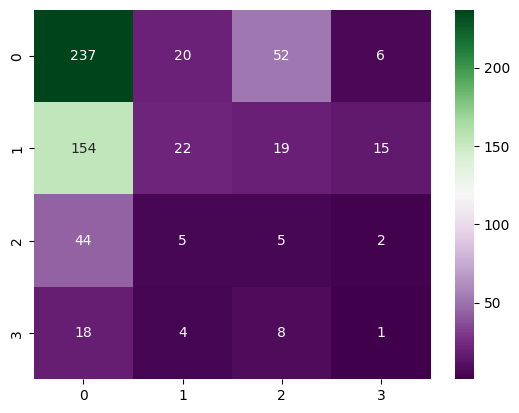

In [42]:
#confusion matrix and classification report
y_act = y_test
y_pred = AddaBoosts.predict(x_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='PRGn', fmt='g')
print(classification_report(y_act,y_pred))

## AddaBoost(Decision Tree)

In [43]:
Decision_tree = DecisionTreeClassifier(max_depth=200, min_samples_leaf=13, random_state=1)
AdaBoost = AdaBoostClassifier(base_estimator = Decision_tree,n_estimators=70,learning_rate=2,random_state=1)
AdaBoost.fit(x_train, y_train)
print('Training score:',AdaBoost.score(x_train, y_train))
print('Testing score:',AdaBoost.score(x_test,y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Training score: 0.7233333333333334
Testing score: 0.32679738562091504


In [44]:
Adaboost_DT = (AdaBoost.score(x_train,y_train),(AdaBoost.score(x_test,y_test)))
Adaboost_DT

(0.7233333333333334, 0.32679738562091504)

              precision    recall  f1-score   support

           0       0.49      0.50      0.50       315
           1       0.32      0.12      0.18       210
           2       0.08      0.30      0.13        56
           3       0.00      0.00      0.00        31

    accuracy                           0.33       612
   macro avg       0.22      0.23      0.20       612
weighted avg       0.37      0.33      0.33       612



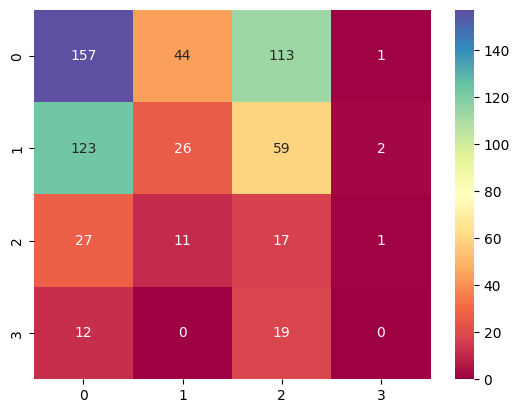

In [45]:
from sklearn.metrics import multilabel_confusion_matrix
#confusion matrix and classification report
y_act = y_test
y_pred = AdaBoost.predict(x_test)
sns.heatmap(confusion_matrix(y_act,y_pred),annot=True,cmap='Spectral', fmt='g')
print(classification_report(y_act,y_pred))
